<a href="https://colab.research.google.com/github/VitorFRodrigues/PUCMinas_DataScience/blob/main/06-Machine_Learning/Tarefas/Exec_DeciTree/Exec_DeciTreeI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático I - Árvore de decisão

Instituição: Pontifícia Universidade Católica de Minas Gerais

Aluno:

1. Vitor Fernando de Souza Rodrigues

Disciplina: Machine Learning

Docente: Cristiano Rodrigues de Carvalho

# 1. Introdução

# 2. Objetivos

* O objetivo dessa atividade é classificar pessoas pela sua propensão a comprar um novo leitor digital (eReader), de modo a melhorar a efetividade de campanhas de marketing.

* Para alcançar este objetivo, iremos utilizar o modelo de árvores de decisão para minerar hábitos de consumo de usuários de um site de e-commerce. O sociólogo Everett Rogers publicou, na década de 60, um trabalho que mostrava a adoção de novas tecnologias por consumidores. Ele identificou os seguintes grupos de consumidores: inovators, early adopters, early majority e late majority. Os dois primeiros grupos compreendem os usuários mais propensos a comprar uma nova tecnologia, enquanto os dois últimos eventualmente poderão comprar a tecnologia, se achar conveniente.

# 3. Coleta de Dados

Para esta atividade temos a base de dados fornecida pelo professor e salva no [github](https://github.com/VitorFRodrigues/PUCMinas_DataScience/blob/main/06-Machine_Learning/Tarefas/Exec_DeciTree/Atividade%203%20-%20Bases.xlsx), que contém os registros já classificados.

## 3.1 Importação de Bibliotecas utilizadas neste Notebook

Este tópico será utilizado para armazenar em uma única célula todas as bibliotecas importadas

In [189]:
# Análise de dados
import pandas as pd
import numpy as np

# Categorização de dados
from sklearn.preprocessing import OneHotEncoder

# Vizualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning e medidores de erro
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## 3.2 Importação dos dados e descrição dos datasets

Conforme dito anteriormente, vamos baixar os dados do link exposto acima.

In [190]:
url = 'https://github.com/VitorFRodrigues/PUCMinas_DataScience/raw/refs/heads/main/06-Machine_Learning/Tarefas/Exec_DeciTree/Atividade%203%20-%20Bases.xlsx'
dados = pd.read_excel(url, engine='openpyxl')

In [191]:
dados.head()

,ID_usuário,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
0,9552,M,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência,Late Majority
1,6757,M,27,C,Intermitente,Sim,Não,Sim,Não,Transferência,Innovator
2,3599,F,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência,Early Adopter
3,6811,M,49,C,Esporádico,Sim,Sim,Sim,Sim,Website,Early Adopter
4,4104,M,29,S,Esporádico,Sim,Sim,Sim,Não,Website,Late Majority


* Dados de entrada

| Coluna                      | Descrição                                                                                                 |
| --------------------------- | --------------------------------------------------------------------------------------------------------- |
| ID_usuário                  | um identificador numérico associado a cada pessoa que possui uma conta no site.                           |
| Gênero                      | M (masculino) ou F (feminino).                                                                            |
| Idade                       | numérico.                                                                                                 |
| Estado_civil                | C – casado, S – não casados (solteiros, viúvos, divorciados, etc.).                                       |
| Atividade_no_site           | Esporádico, Intermitente, Frequente.                                                                      |
| Pesquisou_eletronicos_12m   | Sim/Não indicando se o usuário andou pesquisando eletrônicos no site nos últimos 12 meses.              |
| Comprou_eletronicos_12m     | Sim/Não indicando se o usuário comprou eletrônicos no site nos últimos 12 meses.                        |
| Pesquisou_mídia_digital_18m | Sim/Não indicando se o usuário andou pesquisando mídia digital (como mp3) no site nos últimos 18 meses. |
| Comprou_mídia_digital_18m   | Sim/Não indicando se o usuário comprou mídia digital (como mp3) no site nos últimos 18 meses.           |
| Forma_pagamento             | Transferência; Website; Cartão e Boleto bancário.                                                         |

* Dados de saída: Adoção_eReader - Esse atributo será o rótulo classificador (label)

| Variáveis de saída | Descrição                                                                                |
| ------------------ | ---------------------------------------------------------------------------------------- |
| Inovator           | quem comprou eReaders de geração anteriores até 1 semana após o lançamento.              |
| Early Adopter      | quem comprou eReaders de geração anteriores entre 1 e 3 semanas após o lançamento.       |
| Early Majority     | quem comprou eReaders de geração anteriores entre 3 semanas e 2 meses após o lançamento. |
| Late Majority      | quem comprou eReaders de geração anteriores após 2 meses do lançamento.                  |

# 4. Processamento / Tratamento de Dados

Primeiramente vamos extrair informações básicas dos dados.

In [192]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID_usuário                   661 non-null    int64 
 1   Gênero                       661 non-null    object
 2   Idade                        661 non-null    int64 
 3   Estado_civil                 661 non-null    object
 4   Atividade_no_site            661 non-null    object
 5   Pesquisou_eletronicos_12m    661 non-null    object
 6   Comprou_eletronicos_12m      661 non-null    object
 7   Pesquisou_mídia_digital_18m  661 non-null    object
 8   Comprou_mídia_digital_18m    661 non-null    object
 9   Forma_pagamento              661 non-null    object
 10  Adoção_eReader               661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB


In [193]:
dados.duplicated().sum()

0

Com isto, idenficamos que:
* Não há dados nulos em nossa base
* Não há dados duplicados em nossa base
* Maioria das colunas (features) são do tipo categóricas

Vamos investigar os valores únicos de cada coluna categórica

In [194]:
for coluna in dados.select_dtypes(include=['object']).columns:
  print(f"Valores únicos da coluna '{coluna}': {dados[coluna].unique()}")

Valores únicos da coluna 'Gênero': ['M' 'F']
Valores únicos da coluna 'Estado_civil': ['C' 'S']
Valores únicos da coluna 'Atividade_no_site': ['Esporádico' 'Intermitente' 'Frequênte']
Valores únicos da coluna 'Pesquisou_eletronicos_12m': ['Sim' 'Não']
Valores únicos da coluna 'Comprou_eletronicos_12m': ['Sim' 'Não']
Valores únicos da coluna 'Pesquisou_mídia_digital_18m': ['Sim' 'Não']
Valores únicos da coluna 'Comprou_mídia_digital_18m': ['Não' 'Sim']
Valores únicos da coluna 'Forma_pagamento': ['Transferência' 'Website' 'Cartão de crédito' 'Boleto bancário']
Valores únicos da coluna 'Adoção_eReader': ['Late Majority' 'Innovator' 'Early Adopter' 'Early Majority']


Vamos utilizar OneHotEncoder para transformar os dados categóricos em dados numéricos com o código abaixo:

In [195]:
# Criar uma cópia do DataFrame para evitar modificar o original
dados_encoded = dados.copy()

# Converter a coluna 'Adoção_eReader' para tipo categórico
dados_encoded['Adoção_eReader'] = dados_encoded['Adoção_eReader'].astype('category')

# Lista das colunas do tipo 'object' (exceto a última)
colunas_object = dados_encoded.select_dtypes(include=['object']).columns

# Aplicar OneHotEncoder para cada coluna do tipo 'object'
for coluna in colunas_object:
  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  encoded_data = encoder.fit_transform(dados_encoded[[coluna]])
  feature_names = [f"{coluna}_{category}" for category in encoder.categories_[0]]
  encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
  dados_encoded = pd.concat([dados_encoded.drop(coluna, axis=1), encoded_df], axis=1)

dados_encoded.info()
dados_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ID_usuário                         661 non-null    int64   
 1   Idade                              661 non-null    int64   
 2   Adoção_eReader                     661 non-null    category
 3   Gênero_F                           661 non-null    float64 
 4   Gênero_M                           661 non-null    float64 
 5   Estado_civil_C                     661 non-null    float64 
 6   Estado_civil_S                     661 non-null    float64 
 7   Atividade_no_site_Esporádico       661 non-null    float64 
 8   Atividade_no_site_Frequênte        661 non-null    float64 
 9   Atividade_no_site_Intermitente     661 non-null    float64 
 10  Pesquisou_eletronicos_12m_Não      661 non-null    float64 
 11  Pesquisou_eletronicos_12m_Sim      661 non-nu

,ID_usuário,Idade,Adoção_eReader,Gênero_F,Gênero_M,Estado_civil_C,Estado_civil_S,Atividade_no_site_Esporádico,Atividade_no_site_Frequênte,Atividade_no_site_Intermitente,...,Comprou_eletronicos_12m_Não,Comprou_eletronicos_12m_Sim,Pesquisou_mídia_digital_18m_Não,Pesquisou_mídia_digital_18m_Sim,Comprou_mídia_digital_18m_Não,Comprou_mídia_digital_18m_Sim,Forma_pagamento_Boleto bancário,Forma_pagamento_Cartão de crédito,Forma_pagamento_Transferência,Forma_pagamento_Website
0,9552,61,Late Majority,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6757,27,Innovator,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3599,29,Early Adopter,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,6811,49,Early Adopter,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4104,29,Late Majority,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# 5. Análise e Exploração dos dados

Nossa base de dados é composta com uma população mais velha que realiza compras, como pode ser visto no histograma abaixo.

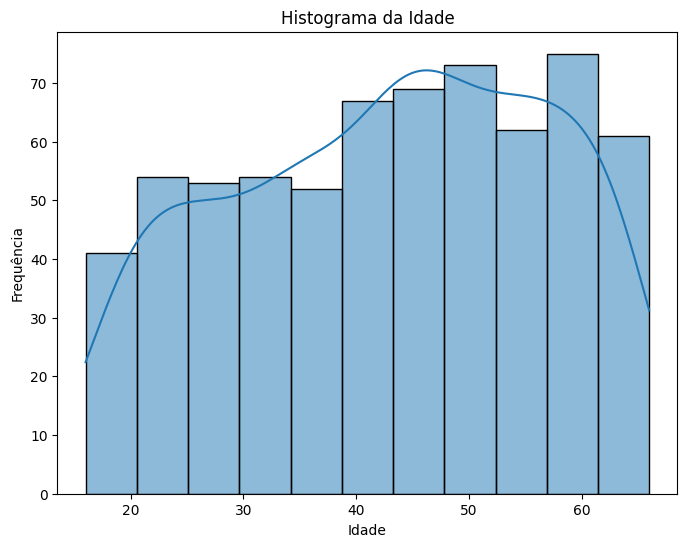

In [196]:
# Histograma da idade
plt.figure(figsize=(8, 6))
sns.histplot(dados_encoded['Idade'], kde=True)
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Aqueles que compraram com um delay de 1 a 3 semanas após lançamento lideram a base, sendo o último aqueles que compram até 1 semana após o lançamento.

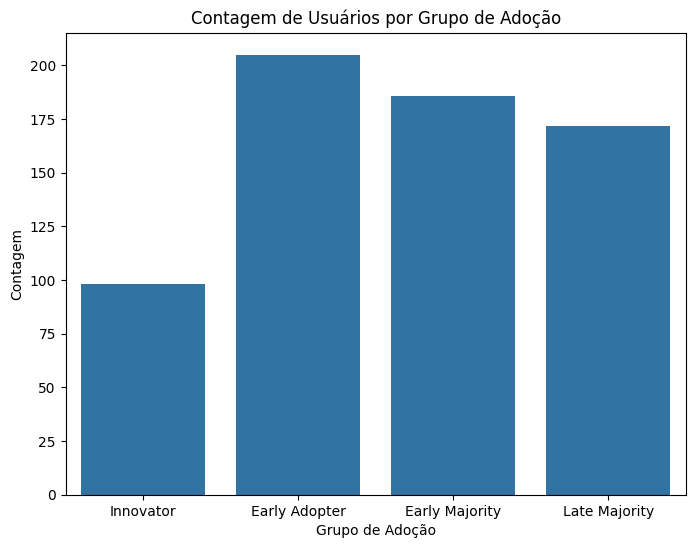

In [210]:
# Gráfico de barras da Adoção_eReader
plt.figure(figsize=(8, 6))
order = ['Innovator', 'Early Adopter', 'Early Majority', 'Late Majority']
sns.countplot(x='Adoção_eReader', data=dados_encoded, order=order)
plt.title('Contagem de Usuários por Grupo de Adoção')
plt.xlabel('Grupo de Adoção')
plt.ylabel('Contagem')
plt.show()

| Variáveis de saída | Descrição                                                                                |
| ------------------ | ---------------------------------------------------------------------------------------- |
| Inovator           | quem comprou eReaders de geração anteriores até 1 semana após o lançamento.              |
| Early Adopter      | quem comprou eReaders de geração anteriores entre 1 e 3 semanas após o lançamento.       |
| Early Majority     | quem comprou eReaders de geração anteriores entre 3 semanas e 2 meses após o lançamento. |
| Late Majority      | quem comprou eReaders de geração anteriores após 2 meses do

Pessoas casadas aparentam ter costume de comprar mais livros do que pessoas não-casadas.

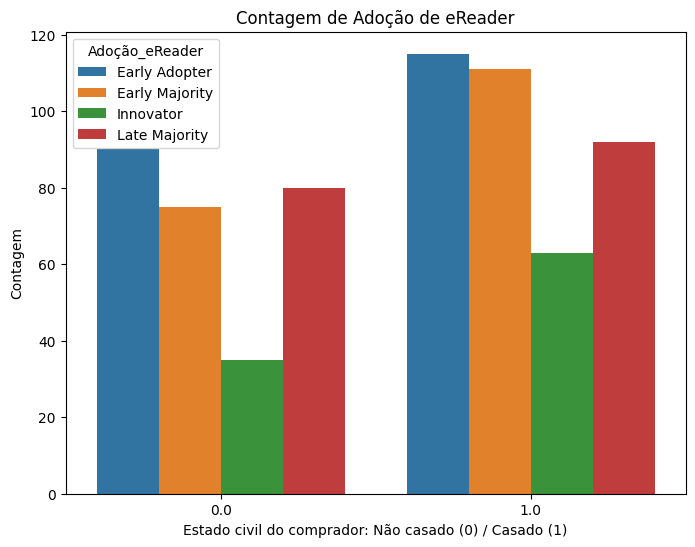

In [198]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Estado_civil_C', hue='Adoção_eReader', data=dados_encoded)
plt.title('Contagem de Adoção de eReader')
plt.xlabel('Estado civil do comprador: Não casado (0) / Casado (1)')
plt.ylabel('Contagem')
plt.show()

# 6. Preparação dos Dados para os Modelos de Aprendizado de Máquina

Vamos separar em dados de entrada e saída.
* Saída: coluna devidamente categorizada 'Adoção_eReader'
* Entrada: Todas as colunas de dados_encoded com exceção do 'ID_usuário' e 'Adoção_eReader'

In [199]:
y = dados_encoded['Adoção_eReader']
X = dados_encoded.drop(['ID_usuário', 'Adoção_eReader'], axis=1)

Uma vez que os dados estão devidamente separados. Utilizaremos o train_test_split para separar o conjunto em dados de treino e teste.

In [200]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 7. Aplicação de Modelos de Aprendizado de Máquina

Por fim, vamos treinar o modelo de árvore de decisão. Analisaremos os resultados na seção seguinte.

In [201]:
# Crie e treine o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)

# Faça previsões no conjunto de teste
y_pred = modelo_arvore.predict(x_test)

# 8. Avaliação dos Modelos de Aprendizado de Máquina e Discussão dos Resultados

# 8.1. Avaliação sem considerar hiperparâmetros

In [202]:
# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.4759036144578313

Relatório de Classificação:
                precision    recall  f1-score   support

 Early Adopter       0.52      0.52      0.52        60
Early Majority       0.44      0.40      0.41        43
     Innovator       0.35      0.41      0.38        22
 Late Majority       0.54      0.54      0.54        41

      accuracy                           0.48       166
     macro avg       0.46      0.46      0.46       166
  weighted avg       0.48      0.48      0.48       166



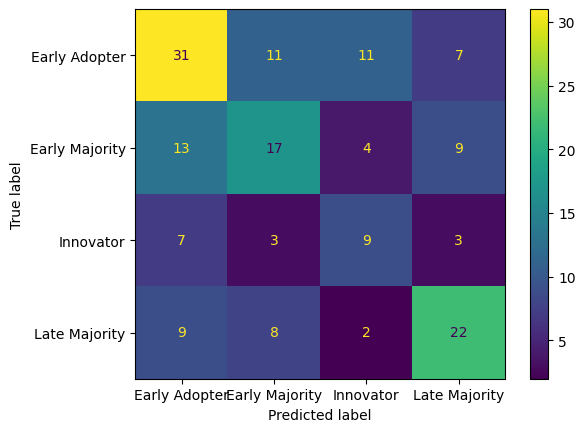

In [203]:
# Matrix de Confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

A partir da imagem do modelo preditivo de árvore de decisão e da matriz de confusão, podemos fazer algumas observações importantes sobre o desempenho do modelo.

1. **Acurácia Geral: 0.4759 (47.59%)**: A acurácia geral é razoavelmente baixa. Isso indica que o modelo não está classificando corretamente a maioria das amostras de teste.
   
2. **Relatório de Classificação:**
   - **Early Adopter (52% precisão, 52% recall, 52% f1-score)**: Essa classe foi prevista com precisão e recall moderados, indicando um desempenho razoável para identificar "Early Adopters".
   - **Early Majority (44% precisão, 40% recall, 41% f1-score)**: Esta classe tem um desempenho abaixo da média, com baixo recall (40%), sugerindo que o modelo tem dificuldade em prever corretamente a "Early Majority".
   - **Innovator (35% precisão, 41% recall, 38% f1-score)**: Para a classe "Innovator", o recall é razoável, mas a precisão é baixa (35%). Isso pode significar que o modelo está classificando erroneamente muitos exemplos de outras classes como "Innovators".
   - **Late Majority (54% precisão, 54% recall, 54% f1-score)**: O modelo tem um desempenho relativamente bom para a classe "Late Majority", com boa precisão e recall.
   - **Macro avg (média macro):** 0.46 para precision, recall, e f1-score, mostrando que o desempenho em geral é uniforme entre as classes, mas com valores baixos.
   - **Weighted avg (média ponderada):** 0.48 para todas as métricas, refletindo o impacto das classes com mais dados.

3. **Matriz de Confusão:**
   - **Early Adopter:** A maioria (31) das instâncias da classe "Early Adopter" foi corretamente classificada, mas há erros significativos (11 classificados como "Early Majority" e "Innovator", e 7 como "Late Majority").
   - **Early Majority:** Dos 43 exemplos da "Early Majority", apenas 17 foram corretamente classificados. Há confusão significativa com "Early Adopter" (13) e "Late Majority" (9).
   - **Innovator:** O modelo teve dificuldades em classificar corretamente "Innovator". Dos 22 exemplos, 9 foram corretamente classificados, mas houve confusão com "Early Adopter" (7) e "Early Majority" (3).
   - **Late Majority:** O desempenho é um pouco melhor para a "Late Majority", com 22 classificações corretas, embora ainda haja confusão com "Early Majority" (8) e "Early Adopter" (9).

4. **Análise Geral:**
   - **Confusão entre classes adjacentes:** O modelo tem dificuldades em distinguir classes com padrões temporais próximos, como "Early Adopter" e "Early Majority". Isso pode indicar que as características temporais não são suficientes ou que o modelo está subajustado.
   - **Melhor performance para "Late Majority":** A classe "Late Majority" apresenta o melhor desempenho em precisão e recall, sugerindo que o modelo consegue capturar melhor esse padrão de compra.
   - **A classe "Innovator" tem o pior desempenho:** Isso pode ser explicado pela menor quantidade de dados (apenas 22 amostras no conjunto de teste) ou pela dificuldade em distinguir os primeiros compradores.

# 8.2. Avaliação editando dados retirando colunas redundantes (_Drop='first'_)

Com o intuito de buscar melhorias para a eficiencia do modelo, vamos fazer mais um tratamento no dataset antes de seguirmos para hiperparametros. O **dados_encoded** tratado previamente fez uso do OneHotEncoder para dados categóricos, mantendo todas as opções. Agora, vamos tratar este dataset, removendo uma das colunas categorizadas.

O "drop_first" em OneHotEncoding é usado para evitar a multicolinearidade em modelos lineares, pois as colunas criadas pela codificação são altamente correlacionadas.

Ao remover a primeira coluna de cada categoria, mantemos as informações de cada categoria sem criar dependências lineares, economizando espaço e evitando problemas em modelos que não lidam bem com dados redundantes (ex: regressão linear).

In [204]:
# Criar uma cópia do DataFrame para evitar modificar o original
dados_encoded = dados.copy()

# Converter a coluna 'Adoção_eReader' para tipo categórico
dados_encoded['Adoção_eReader'] = dados_encoded['Adoção_eReader'].astype('category')

# Lista das colunas do tipo 'object' (exceto a última)
colunas_object = dados_encoded.select_dtypes(include=['object']).columns

# Aplicar OneHotEncoder para cada coluna do tipo 'object'
for coluna in colunas_object:
  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
  encoded_data = encoder.fit_transform(dados_encoded[[coluna]])
  feature_names = [f"{coluna}_{category}" for category in encoder.categories_[0][1:]]
  encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
  dados_encoded = pd.concat([dados_encoded.drop(coluna, axis=1), encoded_df], axis=1)

dados_encoded.info()
dados_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ID_usuário                         661 non-null    int64   
 1   Idade                              661 non-null    int64   
 2   Adoção_eReader                     661 non-null    category
 3   Gênero_M                           661 non-null    float64 
 4   Estado_civil_S                     661 non-null    float64 
 5   Atividade_no_site_Frequênte        661 non-null    float64 
 6   Atividade_no_site_Intermitente     661 non-null    float64 
 7   Pesquisou_eletronicos_12m_Sim      661 non-null    float64 
 8   Comprou_eletronicos_12m_Sim        661 non-null    float64 
 9   Pesquisou_mídia_digital_18m_Sim    661 non-null    float64 
 10  Comprou_mídia_digital_18m_Sim      661 non-null    float64 
 11  Forma_pagamento_Cartão de crédito  661 non-nu

,ID_usuário,Idade,Adoção_eReader,Gênero_M,Estado_civil_S,Atividade_no_site_Frequênte,Atividade_no_site_Intermitente,Pesquisou_eletronicos_12m_Sim,Comprou_eletronicos_12m_Sim,Pesquisou_mídia_digital_18m_Sim,Comprou_mídia_digital_18m_Sim,Forma_pagamento_Cartão de crédito,Forma_pagamento_Transferência,Forma_pagamento_Website
0,9552,61,Late Majority,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,6757,27,Innovator,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3599,29,Early Adopter,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,6811,49,Early Adopter,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,4104,29,Late Majority,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [205]:
def Treinar_e_Avaliar_Modelo(dados):
  y = dados['Adoção_eReader']
  X = dados.drop(['ID_usuário', 'Adoção_eReader'], axis=1)
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  modelo = DecisionTreeClassifier()
  modelo.fit(x_train, y_train)
  y_pred = modelo.predict(x_test)

  # Avalie o desempenho do modelo
  acuracia = accuracy_score(y_test, y_pred)
  print(f"Acurácia: {acuracia}")

  # Relatório de Classificação
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

  # Matrix de Confusão
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  plt.show()
  return modelo

Acurácia: 0.4879518072289157

Relatório de Classificação:
                precision    recall  f1-score   support

 Early Adopter       0.53      0.52      0.52        60
Early Majority       0.47      0.40      0.43        43
     Innovator       0.38      0.45      0.42        22
 Late Majority       0.51      0.56      0.53        41

      accuracy                           0.49       166
     macro avg       0.47      0.48      0.48       166
  weighted avg       0.49      0.49      0.49       166



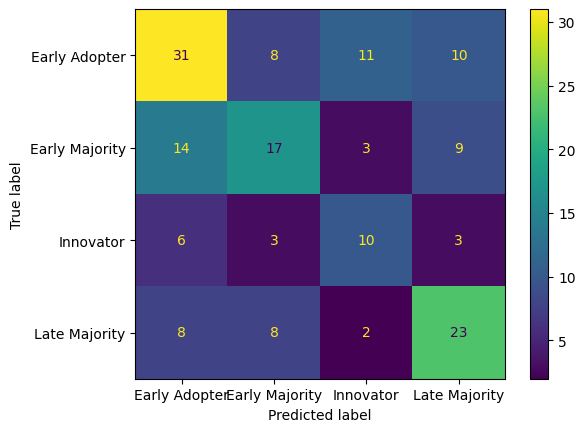

In [206]:
modelo = Treinar_e_Avaliar_Modelo(dados_encoded)

Ao analisar os novos resultados após a aplicação do `OneHotEncoder` com o parâmetro `drop='first'`, podemos observar as seguintes mudanças no desempenho do modelo preditivo de árvore de decisão.

1. **Acurácia Geral: 0.4879 (48.79%):** Houve um pequeno aumento na acurácia em relação à execução anterior (de 47.59% para 48.79%). Embora o aumento seja modesto, sugere que o modelo foi levemente beneficiado pela nova codificação das variáveis categóricas.

2. **Relatório de Classificação:**
   - As métricas de **precision**, **recall** e **f1-score** para as classes se alteraram:
     - **Early Adopter:**
       - Precision: 0.53 (aumentou de 0.52)
       - Recall: 0.52 (manteve-se)
       - F1-score: 0.52 (manteve-se)
     - **Early Majority:**
       - Precision: 0.47 (melhora em relação aos 0.44 anteriores)
       - Recall: 0.40 (manteve-se)
       - F1-score: 0.43 (subiu de 0.41)
     - **Innovator:**
       - Precision: 0.38 (subiu de 0.35)
       - Recall: 0.45 (subiu de 0.41)
       - F1-score: 0.42 (subiu de 0.38)
     - **Late Majority:**
       - Precision: 0.51 (caiu levemente de 0.54)
       - Recall: 0.56 (melhora em relação aos 0.54 anteriores)
       - F1-score: 0.53 (manteve-se)
       
   **Resumo:**
   - Melhorias modestas foram observadas na classe "Early Majority" e "Innovator". Isso sugere que a codificação com `drop='first'` pode ter ajudado o modelo a lidar melhor com as classes menos prevalentes, mas as melhorias foram limitadas.

3. **Matriz de Confusão:**
   - **Early Adopter:** Dos 60 exemplos, 31 foram classificados corretamente. No entanto, ainda há confusões com "Early Majority" (8) e "Innovator" (11). Houve um pequeno aumento na classificação incorreta para "Late Majority" (de 7 para 10).
   - **Early Majority:** A classe "Early Majority" ainda sofre de confusão com "Early Adopter" (14 amostras), mas 17 amostras foram corretamente classificadas, o que representa uma leve melhora.
   - **Innovator:** A classe "Innovator" teve 10 exemplos corretamente classificados, com confusão restante com "Early Adopter" (6) e "Early Majority" (3). Houve uma melhoria em relação à execução anterior, onde apenas 9 exemplos foram corretamente classificados.
   - **Late Majority:** "Late Majority" tem uma classificação ligeiramente melhorada (23 exemplos corretos, em comparação com 22 anteriormente), mas a confusão com "Early Adopter" e "Early Majority" persiste.

4. **Análise Geral:**
   - **Melhorias marginais nas classes menores:** As melhorias nas classes "Innovator" e "Early Majority" são pequenas, mas notáveis, especialmente para recall e f1-score. O uso do `drop='first'` pode ter ajudado a eliminar alguma redundância nas variáveis categóricas, tornando o modelo mais eficiente na identificação dessas classes menos representadas.
   - **Confusão entre classes adjacentes:** Ainda há significativa confusão entre classes que representam períodos temporais próximos, como "Early Adopter" e "Early Majority". Isso indica que o modelo ainda pode não estar capturando bem os padrões entre essas classes adjacentes.
   - **Late Majority:** A classe "Late Majority" mantém o melhor desempenho em precisão e recall, provavelmente devido à sua maior separabilidade em relação às outras classes.



# 8.3. Avaliação com treinamento de hiperparâmetros via gridsearch

Por fim, vamos utilizar o último dataset como base, visto que foi obtido uma leve melhora na performance, para encontrar os melhores hiperparametros para o modelo de árvore de decisão.

In [207]:
param_grid_DecTree = [
    {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': np.arange(1,16,1),
        "min_samples_split": np.arange(2, 5),
        "min_samples_leaf": np.arange(2, 5),
    }
]

Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}
Melhor pontuação de acurácia: 0.6161616161616161
Acurácia no conjunto de teste com os melhores parâmetros: 0.572289156626506

Relatório de Classificação:
                precision    recall  f1-score   support

 Early Adopter       0.58      0.58      0.58        60
Early Majority       0.46      0.49      0.47        43
     Innovator       0.46      0.50      0.48        22
 Late Majority       0.78      0.68      0.73        41

      accuracy                           0.57       166
     macro avg       0.57      0.56      0.57       166
  weighted avg       0.58      0.57      0.58       166



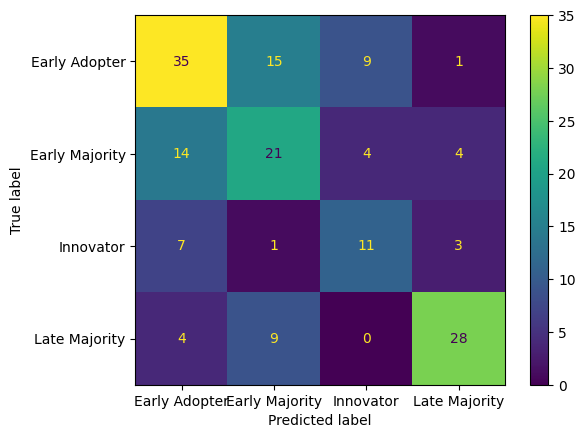

In [208]:
grid_search_DecTree = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid_DecTree,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)
np.random.seed(42)
grid_search_DecTree.fit(x_train, y_train)

print("Melhores parâmetros encontrados:", grid_search_DecTree.best_params_)
print("Melhor pontuação de acurácia:", grid_search_DecTree.best_score_)

# Avaliar o modelo com os melhores parâmetros no conjunto de teste
y_pred = grid_search_DecTree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste com os melhores parâmetros: {accuracy}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


Após o ajuste de hiperparâmetros e o novo treinamento com o mesmo dataset, os resultados demonstram melhorias claras, especialmente em relação à acurácia e ao desempenho das classes individuais. Vamos analisar os principais aspectos:

1. **Acurácia Geral: 0.5722 (57.22%):** A acurácia do modelo aumentou significativamente em comparação às versões anteriores (de 48.79% e 47.59%). Esse aumento de mais de 8% indica que o ajuste de hiperparâmetros (com valores como `max_depth`: 11, `min_samples_leaf`: 4, `min_samples_split`: 4) ajudou a refinar o desempenho do modelo.
   
2. **Relatório de Classificação:**
   - **Early Adopter:**
     - Precision: 0.58 (subiu de 0.53)
     - Recall: 0.58 (melhoria em relação aos 0.52 anteriores)
     - F1-score: 0.58 (subiu de 0.52)
   - **Early Majority:**
     - Precision: 0.46 (caiu levemente de 0.47)
     - Recall: 0.47 (subiu de 0.40)
     - F1-score: 0.43 (melhora marginal)
   - **Innovator:**
     - Precision: 0.46 (melhoria em relação aos 0.38 anteriores)
     - Recall: 0.50 (significativo aumento em relação a 0.45)
     - F1-score: 0.48 (grande aumento, subiu de 0.42)
   - **Late Majority:**
     - Precision: 0.78 (grande aumento em relação aos 0.51 anteriores)
     - Recall: 0.68 (um pouco menor que antes, mas ainda alta)
     - F1-score: 0.73 (melhoria significativa)

   **Resumo:**
   - A classe **Late Majority** teve uma melhoria substancial na precisão e no F1-score. A classe **Innovator** também apresentou uma melhora significativa em todas as métricas, indicando que o modelo está agora melhor em capturar esse grupo menos representado.
   - **Early Adopter** e **Early Majority** mantiveram um desempenho estável, com ligeiras melhoras.

3. **Matriz de Confusão:**
   - **Early Adopter:** Dos 60 exemplos, 35 foram corretamente classificados, o que representa uma melhoria significativa em comparação à execução anterior. Houve uma diminuição considerável da confusão com "Late Majority" (de 10 para 1).
   - **Early Majority:** A classe "Early Majority" ainda tem confusão significativa com "Early Adopter" (14 exemplos), mas 21 amostras foram corretamente classificadas, representando um aumento no desempenho.
   - **Innovator:** A classe "Innovator" teve 11 exemplos corretamente classificados, o que representa uma melhoria em relação às execuções anteriores. A confusão com outras classes, como "Early Adopter", foi reduzida.
   - **Late Majority:** "Late Majority" teve um grande aumento no número de classificações corretas (28 exemplos), com uma redução substancial na confusão com outras classes.

4. **Análise Geral:**
   - **Melhorias substanciais:** O ajuste de hiperparâmetros trouxe grandes melhorias, especialmente para as classes "Innovator" e "Late Majority". Isso sugere que os novos valores como a profundidade da árvore (`max_depth: 11`) e os parâmetros de divisão (`min_samples_split: 4`, `min_samples_leaf: 4`) ajudaram o modelo a capturar melhor as relações nos dados.
   - **Confusões entre classes adjacentes:** Ainda há alguma confusão entre "Early Adopter" e "Early Majority", o que é esperado devido à proximidade temporal dessas categorias. Porém, o modelo agora está separando melhor "Late Majority" das outras classes.
   - **Balanceamento do modelo:** O modelo agora está mais balanceado, com melhorias em praticamente todas as métricas, especialmente o F1-score macro e ponderado.

# 9. Conclusão

O processo de construção, ajuste e avaliação do modelo de árvore de decisão, focado na classificação dos diferentes perfis de compradores de eReaders, evoluiu consideravelmente ao longo das etapas. Inicialmente, o modelo apresentou limitações claras de acurácia e dificuldades em distinguir entre as categorias, especialmente aquelas com proximidade temporal, como "Early Adopter" e "Early Majority". No entanto, após a aplicação de técnicas de pré-processamento, como o uso de OneHotEncoder com `drop='first'`, e a realização de um ajuste de hiperparâmetros, observamos uma melhora significativa no desempenho.

Os principais pontos que levam à conclusão são:

1. **Melhoria de Acurácia e Desempenho Geral**:
   - A acurácia do modelo aumentou de aproximadamente 47.5% para 57.2% após o ajuste de hiperparâmetros. Isso representa um avanço significativo na capacidade do modelo em prever corretamente os grupos de compradores.
   - As métricas de **F1-score**, especialmente o valor macro e ponderado, subiram de cerca de 0.48 para 0.57 e 0.58, respectivamente. Esse crescimento demonstra que o modelo se tornou mais robusto, equilibrando melhor o desempenho em todas as classes.

2. **Evolução no Tratamento de Classes Menos Representadas**:
   - A classe "Late Majority" teve uma melhoria substancial, com a precisão aumentando de 0.51 para 0.78 e o recall de 0.54 para 0.68. A classe "Innovator", que inicialmente era um desafio para o modelo, também teve avanços importantes.
   - O ajuste de hiperparâmetros tornou o modelo mais capaz de identificar corretamente as categorias com menor suporte, como "Innovator", que anteriormente era fortemente confundida com outras classes.

3. **Redução das Confusões**:
   - Houve uma redução significativa na confusão entre "Late Majority" e as outras classes. A matriz de confusão final mostra uma clara melhoria, com mais exemplos sendo corretamente classificados em suas respectivas categorias.
   - Embora ainda existam desafios na separação entre "Early Adopter" e "Early Majority", que compartilham características temporais e comportamentais semelhantes, a situação melhorou em comparação às primeiras execuções.

4. **Importância do Ajuste de Hiperparâmetros**:
   - O uso de parâmetros como `max_depth: 11`, `min_samples_leaf: 4`, e `min_samples_split: 4` foi crucial para alcançar os avanços observados. Esses ajustes permitiram que a árvore de decisão evitasse tanto a subquanto a superajuste, encontrando um equilíbrio entre complexidade e precisão.

# 10. Trabalhos futuros

Apesar das melhorias, há espaço para refinar ainda mais o modelo. Outras abordagens, como algoritmos de ensemble (Random Forest ou Gradient Boosting), podem ser exploradas para alcançar resultados ainda melhores. Também seria interessante aplicar técnicas de amostragem para balancear melhor o número de exemplos em cada classe, o que poderia reduzir a confusão entre as classes mais próximas.

Em resumo, o modelo atual, após as melhorias, apresenta um desempenho satisfatório, especialmente na previsão das classes de maior suporte. O ajuste de hiperparâmetros provou ser uma etapa essencial, resultando em um modelo mais equilibrado e com maior acurácia.